<h><center>Higher Mathematics Project <center><h>
    <h><center>Based on Python 3.8.x<center><h>
        <h><center>September 2021<center><h>


<h>Name: Nabin Shah <br><h>
    <h>Matriculation Number: 28985<br><h>
        <h>Project: Fourier Transformation in 1D, 2D and Implementation<h>

### Requirements to run below codes:

     1. Run:  !pip install opencv-python
     2. Run:  !pip install matplotlib
     3. Run:  !pip install imageio
     
     "!" helps to run install within Jupyter Notebook 
     
  

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time 
import cv2    

In [2]:
#Definig DFT 1D function 

def dis_f_trans_1D(func):
    F=np.zeros(func.shape, dtype=np.complex64)
    n = func.shape[0]
    
    run_time = time.time()   #checks how long it takes to run 
    
    #from u to n-1 frequncy 
    for u in np.arange(n):
        #for every elements of func , x= 0.... n-1
        for x in np.arange(n):
            F[u] += func[x]*np.exp((-1j*2*np.pi*u*x)/n)
            
            
    end_time=time.time()
    res_time= end_time-run_time
    print('Total time taken to run the function: '+ str(res_time)+ 'sec.')
    
    return F/np.sqrt(n)
   

Text(0.5, 1.0, 'signal graph')

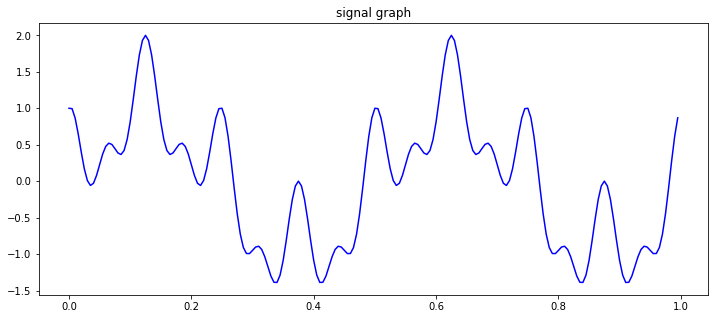

In [3]:
#defining signal based on sines and cosines 
t=np.arange(0,1,0.005)
func=  1* np.sin(t*(2*np.pi)*2)+0.6* np.cos(t*(2*np.pi)*8)+0.4*np.cos(t*(2*np.pi)*16)
plt.figure(figsize=(12,5))
plt.plot(t,func, 'b')
t.shape

plt.title('signal graph')
#plt.savefig('signal graph', bbox_inches='tight')

Total time taken to run the function: 1.1356027126312256sec.


Text(0.5, 1.0, 'Output Frequency')

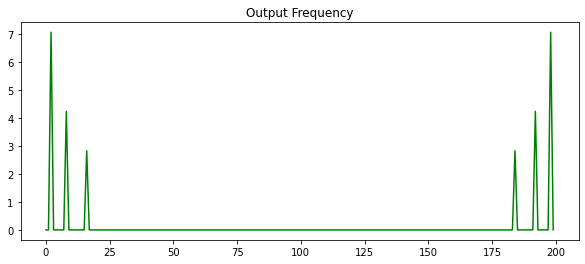

In [4]:
#computing dft in 1d of the the function 
func=1* np.sin(t*(2*np.pi)*2)+0.6* np.cos(t*(2*np.pi)*8)+0.4*np.cos(t*(2*np.pi)*16)
F=dis_f_trans_1D(func)

#frequencies which are evaluated

freque=np.arange(200)

plt.figure(figsize=(10,4))

plt.plot(freque, np.abs(F), 'g')
plt.title("Output Frequency")

#plt.savefig('Output Frequency', bbox_inches='tight')

Text(0.5, 1.0, 'Plotting DFT signal with limit frequency ')

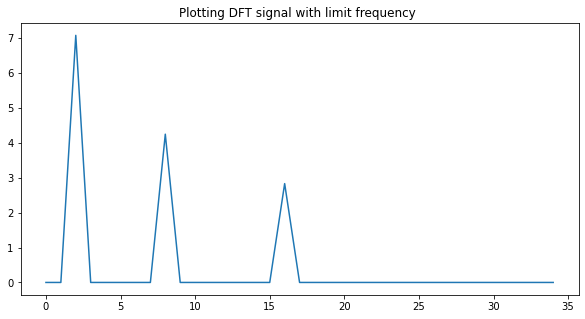

In [5]:
#trying with different frequency limit 
new_lim= 35

#plotting DFT with new frequency limit 
freque=np.arange(new_lim)
plt.figure(figsize=(10,5))
plt.plot(freque,abs(F[:new_lim]))
plt.title ('Plotting DFT signal with limit frequency ')
#plt.savefig('DFT signal with limit freq', bbox_inches='tight')

In [6]:
#optimized DFT fucniton in 1D
def optim_dis_f_trans_1D(func):
    #this will create empty array for complex coefficients 
    coef_array= np.zeros(func.shape, dtype=np.complex64)
    n= func.shape[0]   #vector size
    
    run_time= time.time() #this check how long it takes function to run 
    
    #indices for x 
    x=np.arange (n)
    for i in np.arange(n):
        F[i] = np.sum(func * np.exp((-1j*2*np.pi*i*x)/n))
    
    end_time= time.time()
    fin_res= end_time - run_time
    
    print ('Size of vector in function: '+ str(n)) #vector Output can only be concatanated in str here so output is in str 
    print('Total time taken to run: ', fin_res)
    
    return F/np.sqrt(n)
    
    
    
    

Size of vector in function: 200
Total time taken to run:  0.015003681182861328


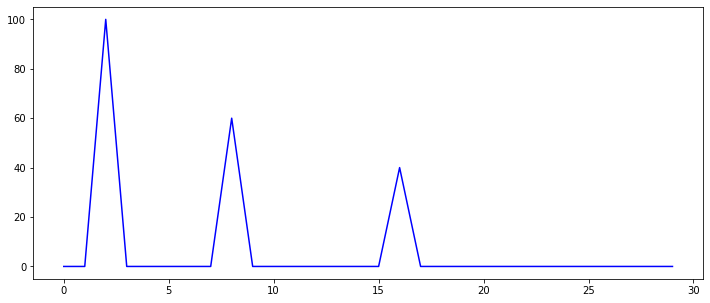

In [7]:
optm_func= optim_dis_f_trans_1D(func)
freq_lim= 30
freq= np.arange(freq_lim)

#plotting figre
plt.figure(figsize=(12,5))
plt.plot(freq, abs(F[:freq_lim]),'b')


(-0.5, 2047.5, 1364.5, -0.5)

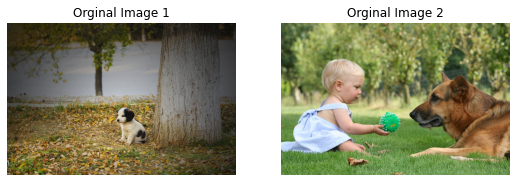

In [8]:
#Image analysis 
fir_img= imageio.imread('./dog-4836608_1920.jpg')   #importing first image 
fir_img2= imageio.imread('./dog.png')

plt.figure(figsize=(9,6))
plt.subplot(121)
plt.axis('off')
plt.title('Orginal Image 1')
plt.imshow(fir_img)
#plt.savefig('Orginal Image 1', bbox_inches='tight')

plt.subplot(122)
plt.title('Orginal Image 2')
plt.imshow(fir_img2)
plt.axis('off')
#plt.savefig('Orginal Image 2', bbox_inches='tight')


Text(0.5, 1.0, 'Blue 2')

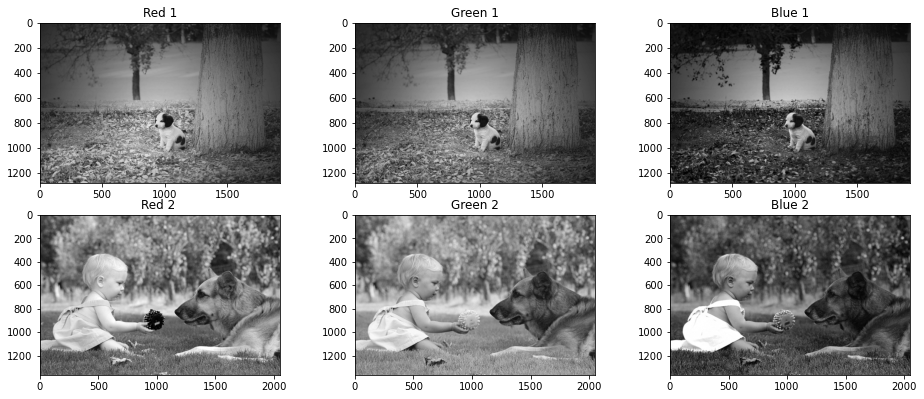

In [9]:
#RBG channels of the photo 
plt.figure(figsize=(16,10))

plt.subplot(331)
plt.imshow(fir_img[:,:,0], cmap='gray')
plt.title('Red 1')

plt.subplot(332)
plt.imshow(fir_img[:,:,1], cmap='gray')
plt.title('Green 1')

plt.subplot(333)
plt.imshow(fir_img[:,:,2], cmap='gray')
plt.title('Blue 1')

plt.subplot(334)
plt.imshow(fir_img2[:,:,0], cmap='gray')
plt.title('Red 2 ')

plt.subplot(335)
plt.imshow(fir_img2[:,:,1], cmap='gray')
plt.title('Green 2')

plt.subplot(336)
plt.imshow(fir_img2[:,:,2], cmap='gray')
plt.title('Blue 2')
#plt.savefig('checking', bbox_inches='tight')




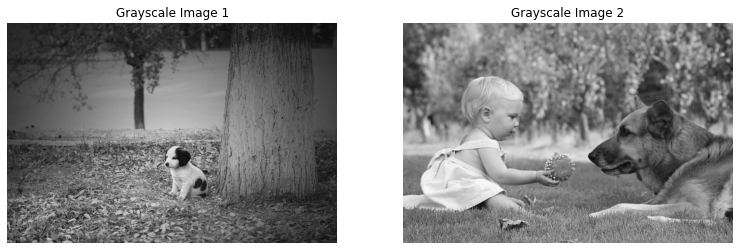

In [10]:

#converting orginal image to grayscale 
fst_img1=cv2.cvtColor(fir_img, cv2.COLOR_RGB2GRAY)
scd_img2=cv2.cvtColor(fir_img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(13,10))
plt.subplot(121)
plt.axis('off')
plt.title('Grayscale Image 1')
plt.imshow(fst_img1, cmap='gray')

plt.subplot(122)
plt.title('Grayscale Image 2')
plt.imshow(scd_img2,cmap='gray')
plt.axis('off')

plt.savefig('Grayscale', bbox_inches='tight')

In [11]:
#extract subimages 
begn= 10000
overall= 1024

v1=fst_img1.reshape([fst_img1.shape[0]*fst_img1.shape[1]])
v1=v1[begn:begn+overall]

v2=scd_img2.reshape([scd_img2.shape[0]*scd_img2.shape[1]])
v2=v2[begn:begn+overall]


Text(0.5, 1.0, 'Noise Second Image')

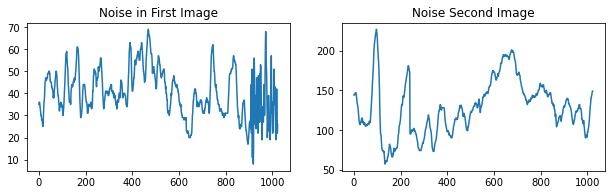

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(231)
plt.plot(v1)
plt.title('Noise in First Image')
#plt.savefig('Noise in first image.png',bbox_inches= 'tight')

plt.subplot(232)
plt.plot(v2)
plt.title('Noise Second Image')


In [13]:
#DFT in 2D space
def dis_fT_2D(func):
    #for empty array 
    compl_coef=np.zeros(func.shape,dtype=np.complex64)
    n,m=func.shape[0:2]
    
    run_time= time.time()  #checks run time of function 
    
    #indices of x and y
    a=np.arange(n)
    b=np.arange (m)
    
    #for every frequency u and v
    
    for u in np.arange(n):
        for v in np.arange(m):
            #pixel of images
            for a in np.arange(n):
                for b in np.arange(m):
                    compl_coef[u,v]+=func[a,b]*np.exp((-1j*2*np.pi)* (((u*a)/n)+((v*b)/m)))  

                    
    end_tim= time.time()
    resul_time= end_tim - run_time
    
    print('Size of vector: '+ str(n))
    print('Total run time is '+ str(resul_time)+ 'sec')
    
    return compl_coef/np.sqrt(n*m)

Size of vector: 32
Total run time is 26.518496990203857sec
Size of vector: 32
Total run time is 26.733046054840088sec


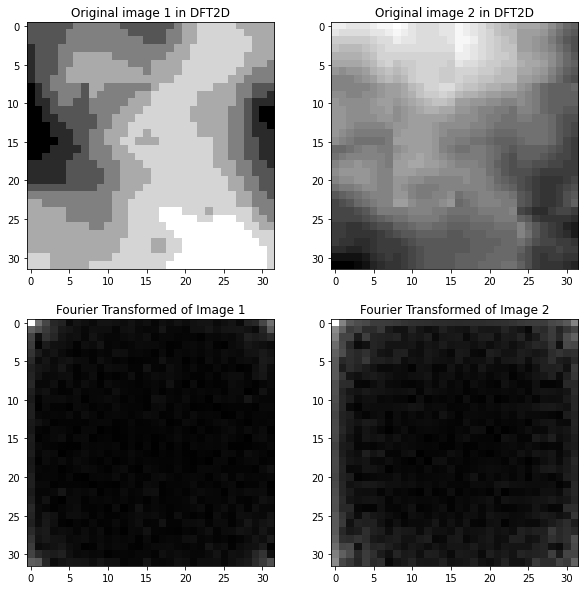

In [14]:
#extract image with 32x32=1024 pixels

total_siz= 32
fir_imag= fst_img1[:total_siz, :total_siz]
sec_imag= scd_img2[:total_siz, :total_siz]

run_dtf2d=dis_fT_2D(fir_imag)
run2_dtf2d= dis_fT_2D(sec_imag)

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(fir_imag, cmap='gray')
plt.title('Original image 1 in DFT2D')

plt.subplot(222)
plt.imshow(sec_imag, cmap='gray')
plt.title('Original image 2 in DFT2D')

#using log magnitudes for better visualize of small coefficient
plt.subplot(223)  # first value with empty pixel represents frequecny zero
plt.imshow(np.log(1+np.abs(run_dtf2d)),cmap='gray')
plt.title('Fourier Transformed of Image 1')

plt.subplot(224)
plt.imshow(np.log(1+np.abs(run2_dtf2d)), cmap='gray')# first value with empty pixel represents frequency zero
plt.title('Fourier Transformed of Image 2')
#plt.savefig('Fourier Transformed.png', bbox_inches='tight')

In [15]:
###implementing a 2D version of DFT 
def inver_dis_FT_2D(func):
    #complex coefficient for empty array 
    
    coef_array= np.zeros(func.shape, dtype=np.int32)
    n,m= func.shape[0:2]
    
    #indices
    ind= np.arange(n)
    #for frequency 
    for i in np.arange(n):
        for j in np.arange(m):
            for k in np.arange(m):
                coef_array[i,j] += np.real( np.sum(func[:,k]* np.exp( (1j*2*np.pi) * (((ind*i)/n)+ ((k*j)/m) ))))
                
    return np.real(coef_array/np.sqrt(n*m))
            

# Power Spectrum 


Size of vector: 32
Total run time is 15.516389846801758sec
Size of vector: 32
Total run time is 19.238825798034668sec


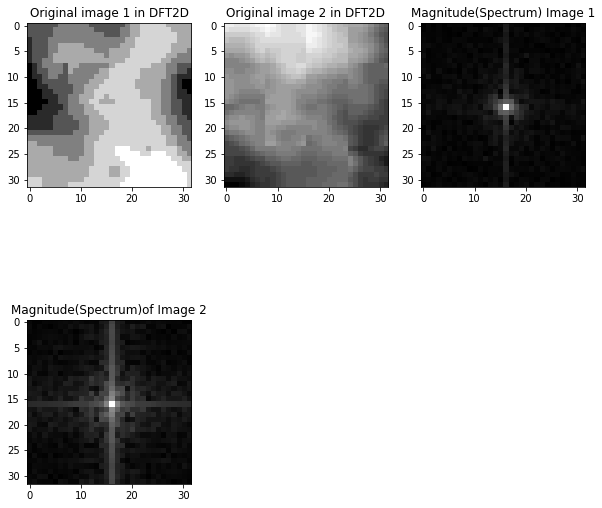

In [19]:
#extract image with 32x32=1024 pixels

total_siz= 32
fir_imag= fst_img1[:total_siz, :total_siz]
sec_imag= scd_img2[:total_siz, :total_siz]

run_dtf2d=dis_fT_2D(fir_imag)
run2_dtf2d= dis_fT_2D(sec_imag)

plt.figure(figsize=(10,10))

plt.subplot(231)
plt.imshow(fir_imag, cmap='gray')
plt.title('Original image 1 in DFT2D')

plt.subplot(232)
plt.imshow(sec_imag, cmap='gray')
plt.title('Original image 2 in DFT2D')

#using log magnitudes for better visualize of small coefficient
plt.subplot(233)  # first value with empty pixel represents frequecny zero
plt.imshow(np.log(1+np.fft.fftshift(np.abs(run_dtf2d))) ,cmap='gray')
plt.title('Magnitude(Spectrum) Image 1')

plt.subplot(234)
plt.imshow(np.log(1+np.fft.fftshift(np.abs(run2_dtf2d))), cmap='gray')# first value with empty pixel represents frequency zero
plt.title('Magnitude(Spectrum)of Image 2')

plt.savefig('Power Spectrum.png', bbox_inches='tight')

# Filter Frequency 


In [17]:
run1= run_dtf2d.shape[0]//2
run2= run_dtf2d.shape[1]//2

cpy_1stF= np.fft.fftshift(run_dtf2d.copy())
cpy_1stF[run1-9:run1+9, run2-9:run2+9]=0  #removes first frequency and squires high pass filter. 
cpy_1stF= np.fft.ifftshift(cpy_1stF)

cpy_2ndF= np.fft.fftshift(run2_dtf2d).copy()
cpy_2ndF[:run1-9, :]=0
cpy_2ndF[:,:run2-9]=0
cpy_2ndF[run2+9:,:]=0   #remove higher frequency and square low pass filter 
cpy_2ndF[:,run2+9]=0

cpy_2ndF=np.fft.ifftshift(cpy_2ndF)

otp1= inver_dis_FT_2D(cpy_1stF)
otp2= inver_dis_FT_2D(cpy_2ndF)


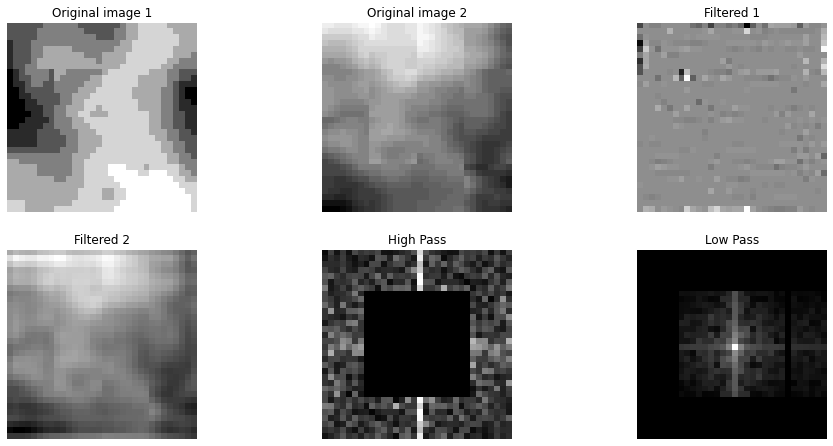

In [20]:
plt.figure(figsize=(16,16))
#orginal images
plt.subplot(431)
plt.imshow(fir_imag, cmap='gray')
plt.title('Original image 1')
plt.axis('off')

plt.subplot(432)
plt.imshow(sec_imag, cmap='gray')
plt.title('Original image 2')
plt.axis('off')


#filtered images plotting
plt.subplot(433)
plt.imshow(otp1, cmap='gray')
plt.title('Filtered 1')
plt.axis('off')

plt.subplot(434)
plt.imshow(otp2, cmap='gray')
plt.title('Filtered 2')
plt.axis('off')

#Magnitude log
plt.subplot(435)
plt.imshow(np.log(1+np.fft.fftshift(np.abs(cpy_1stF))), cmap='gray')
plt.title('High Pass')
plt.axis('off')

plt.subplot(436)
plt.imshow(np.log(1+np.fft.fftshift(np.abs(cpy_2ndF))), cmap='gray')
plt.title('Low Pass')
plt.axis('off')
plt.savefig('Freq filter in diff Band.png', bbox_inches='tight')
